<a href="https://colab.research.google.com/github/SamanMansoor/Deep_learning_PF/blob/main/rice_leaf_diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [41]:
# import libary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import PIL
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import models
from sklearn.metrics import classification_report
import pathlib

# **Load Data**

In [45]:

#  Data Collection and Preprocessing
data_directory = "/content/rice_leaf_diseases"
image_size = (128, 128)  # Adjust to your preferred image size
batch_size = 16

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

train_generator = datagen.flow_from_directory(
    data_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 96 images belonging to 4 classes.
Found 24 images belonging to 4 classes.


In [46]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Set your data directory and other parameters
data_directory = "/content/rice_leaf_diseases"
image_size = (128, 128)
num_images_to_display = 10
num_classes = len(os.listdir(data_directory))



# **Preprocess Images**

In [47]:
# Load and preprocess images
def load_and_preprocess_images(data_directory):
    images = []
    labels = []
    class_names = sorted(os.listdir(data_directory))

    for class_id, class_name in enumerate(class_names):
        class_directory = os.path.join(data_directory, class_name)
        image_files = sorted(os.listdir(class_directory))

        for image_file in image_files:
            image_path = os.path.join(class_directory, image_file)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, image_size)

            images.append(image)
            labels.append(class_id)

    images = np.array(images)
    labels = np.array(labels)
    return images, labels

images, labels = load_and_preprocess_images(data_directory)

# **Image Augmentation**

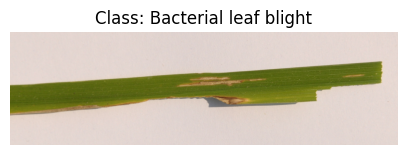

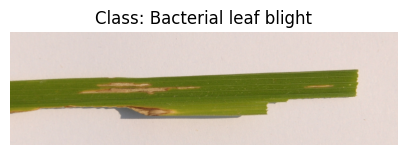

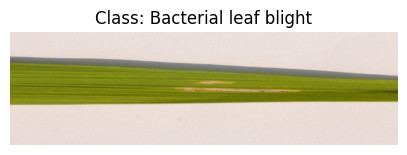

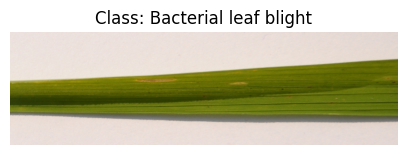

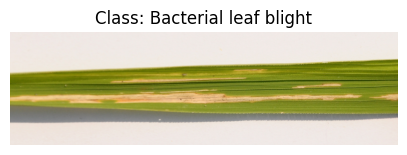

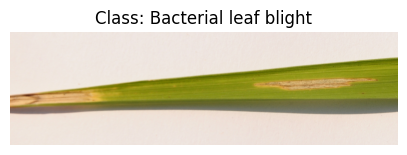

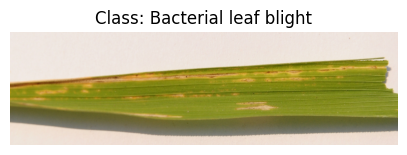

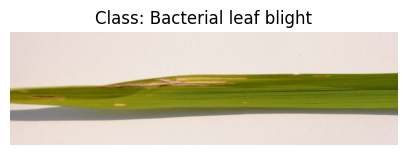

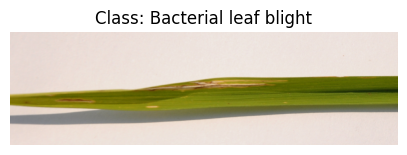

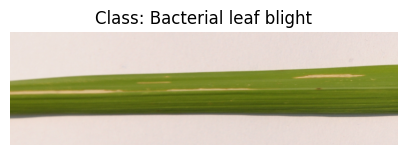

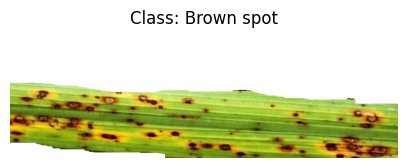

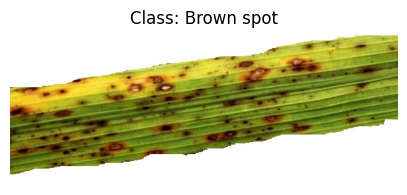

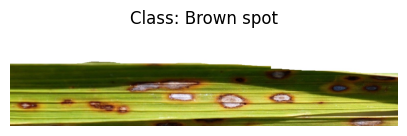

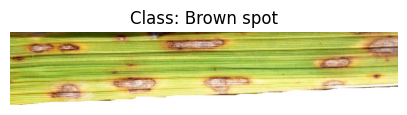

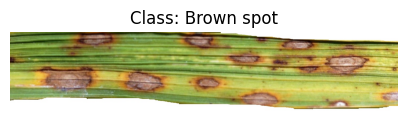

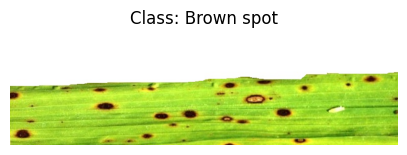

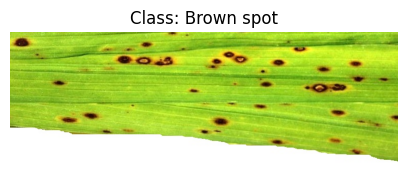

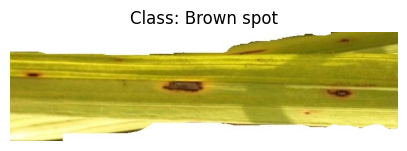

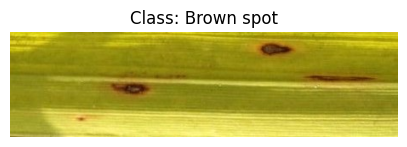

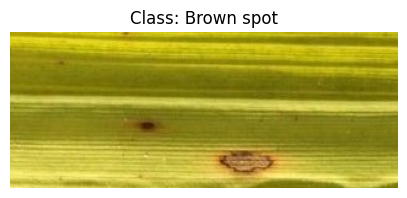

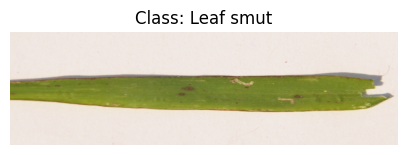

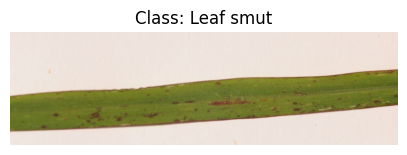

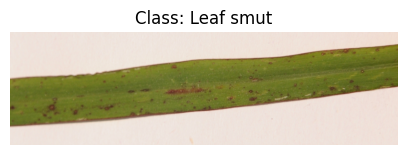

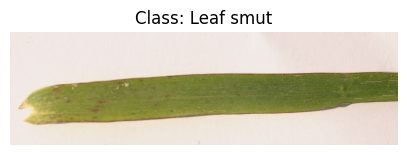

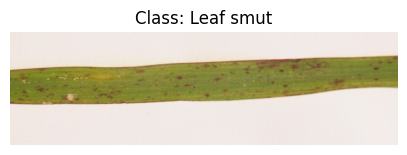

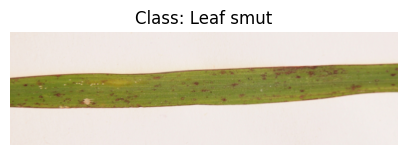

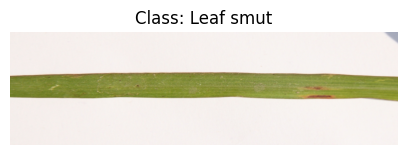

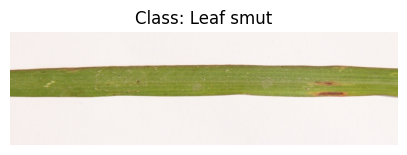

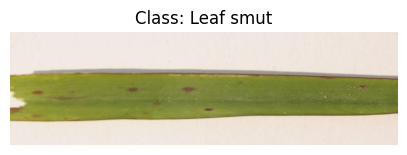

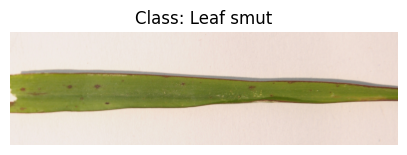

In [48]:
# Define a function for image augmentation
def augment_image(image):
    # Apply your desired image augmentation techniques using OpenCV
    # For example, you can perform rotation, flipping, etc.
    augmented_image = image
    return augmented_image

class_names = sorted(os.listdir(data_directory))  # Get class names

# Load and display augmented images with class names
for class_name in class_names:
    class_directory = os.path.join(data_directory, class_name)
    image_files = sorted(os.listdir(class_directory))

    for image_file in image_files[:num_images_to_display]:
        image_path = os.path.join(class_directory, image_file)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV loads images in BGR format

        augmented_image = augment_image(image)

        plt.figure(figsize=(5, 5))
        plt.imshow(augmented_image)
        plt.title(f"Class: {class_name}")
        plt.axis('off')
        plt.show()


# **Split the Data**

In [49]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

# **CNN MODEL**

In [50]:
# Define the CNN model architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_val, y_val)
print(f"Test accuracy: {test_acc}")

# Save the model
model.save("rice_leaf_disease_model.h5")

Epoch 1/20
3/3 [==============================] - 4s 1s/step - loss: 352.4095 - accuracy: 0.3021 - val_loss: 82.8302 - val_accuracy: 0.2500
Epoch 2/20
3/3 [==============================] - 4s 2s/step - loss: 31.8699 - accuracy: 0.1979 - val_loss: 9.8095 - val_accuracy: 0.2917
Epoch 3/20
3/3 [==============================] - 3s 996ms/step - loss: 4.7429 - accuracy: 0.4271 - val_loss: 4.9157 - val_accuracy: 0.4167
Epoch 4/20
3/3 [==============================] - 3s 1s/step - loss: 3.6625 - accuracy: 0.3854 - val_loss: 2.4288 - val_accuracy: 0.3750
Epoch 5/20
3/3 [==============================] - 3s 1s/step - loss: 2.4885 - accuracy: 0.4479 - val_loss: 1.7899 - val_accuracy: 0.5000
Epoch 6/20
3/3 [==============================] - 4s 1s/step - loss: 1.4684 - accuracy: 0.5521 - val_loss: 1.0360 - val_accuracy: 0.4583
Epoch 7/20
3/3 [==============================] - 3s 1s/step - loss: 0.7898 - accuracy: 0.6771 - val_loss: 0.9342 - val_accuracy: 0.5000
Epoch 8/20
3/3 [==================

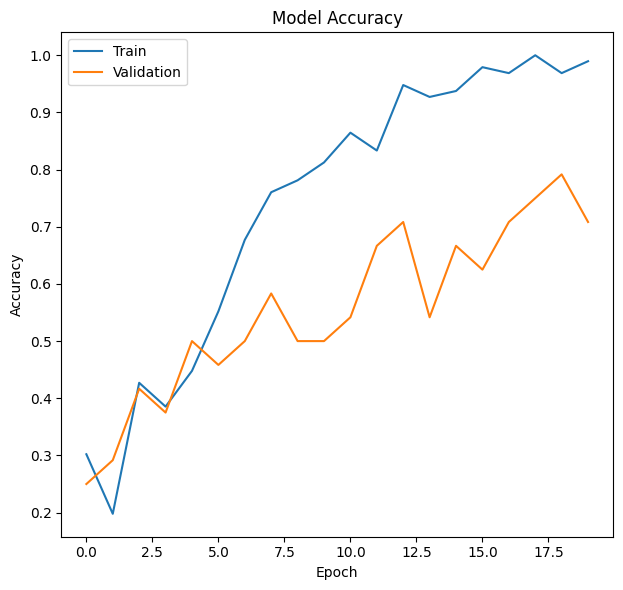

In [61]:
# Plot Training and Validation Curves
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

# **Save The Extracted Features**

In [51]:

# Create a new model that outputs the intermediate layer features
intermediate_layer_model = models.Model(inputs=model.input, outputs=model.layers[-2].output)

# Get intermediate layer outputs (features)
train_features = intermediate_layer_model.predict(X_train)
val_features = intermediate_layer_model.predict(X_val)

# Save the intermediate layer features to a file
np.save("train_features.npy", train_features)
np.save("val_features.npy", val_features)

1/1 [==============================] - 1s 1s/step


# **Apply Machine learning Model**

# **Support Vector Machine (SVVM)**

In [52]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load saved features
train_features = np.load("train_features.npy")
val_features = np.load("val_features.npy")

# Split the labels that you loaded earlier
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

# Train an SVM model
svm_model = SVC(kernel="linear")  # You can try different kernels
svm_model.fit(train_features, y_train)

# Predict on the validation set
y_val_pred = svm_model.predict(val_features)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print("Accuracy:", accuracy)


Accuracy: 0.75


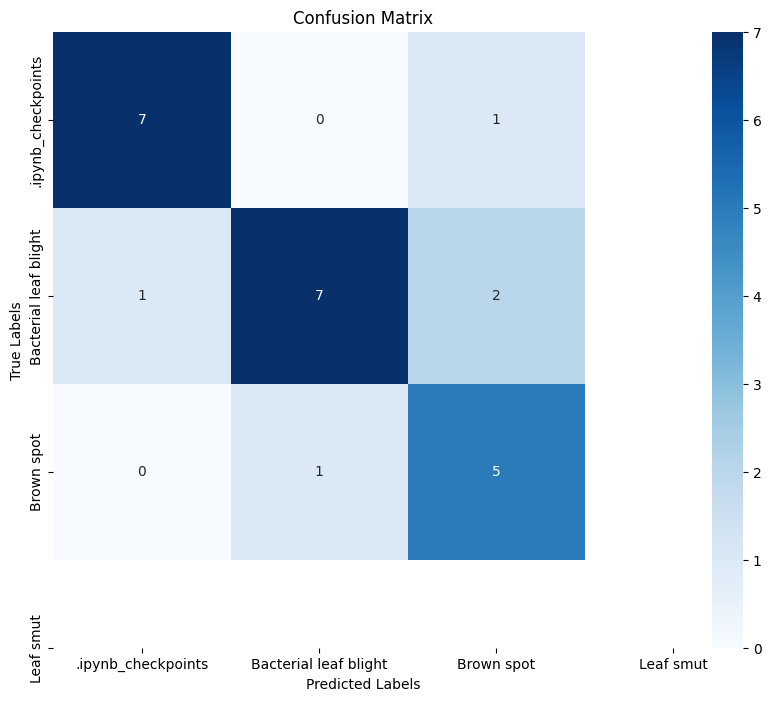

In [80]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Create a confusion matrix
confusion_mat = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


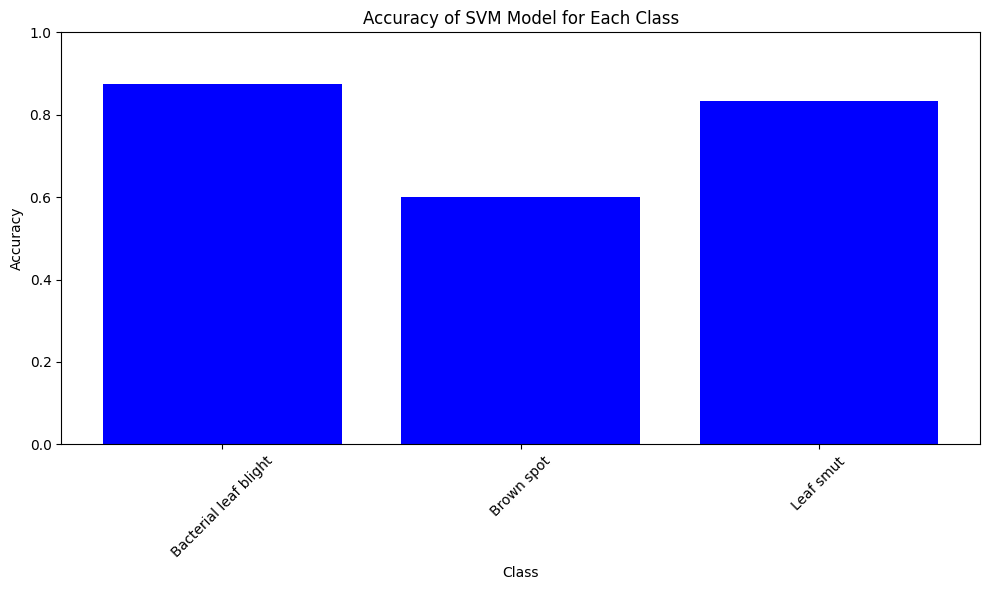

In [92]:
import numpy as np

# Calculate accuracy for each class
class_accuracies = []
for i in range(len(class_names)):
    class_indices = np.where(y_val == i)[0]
    class_accuracy = accuracy_score(y_val[class_indices], y_val_pred[class_indices])
    class_accuracies.append(class_accuracy)

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(class_names, class_accuracies, color='blue')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Accuracy of SVM Model for Each Class')
plt.xticks(rotation=45)
plt.ylim([0, 1])
plt.tight_layout()
plt.show()



# **Classification Report**

In [53]:
from sklearn.metrics import classification_report
# Generate classification report
report = classification_report(y_val, y_val_pred, target_names=class_names, labels=np.unique(y_val))

# Print the classification report

print(report)

                       precision    recall  f1-score   support

   .ipynb_checkpoints       0.78      0.88      0.82         8
Bacterial leaf blight       0.86      0.60      0.71        10
           Brown spot       0.62      0.83      0.71         6

             accuracy                           0.75        24
            macro avg       0.75      0.77      0.75        24
         weighted avg       0.77      0.75      0.75        24



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2326: UserWarning: labels size, 3, does not match size of target_names, 4
  warnings.warn(


# **K-Neighbors Classifier**

In [54]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load saved features
train_features = np.load("train_features.npy")
val_features = np.load("val_features.npy")

# Split the labels that you loaded earlier
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

# Train a k-NN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can choose different values for k
knn_model.fit(train_features, y_train)

# Predict on the validation set
y_val_pred = knn_model.predict(val_features)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", accuracy)


Validation Accuracy: 0.8333333333333334


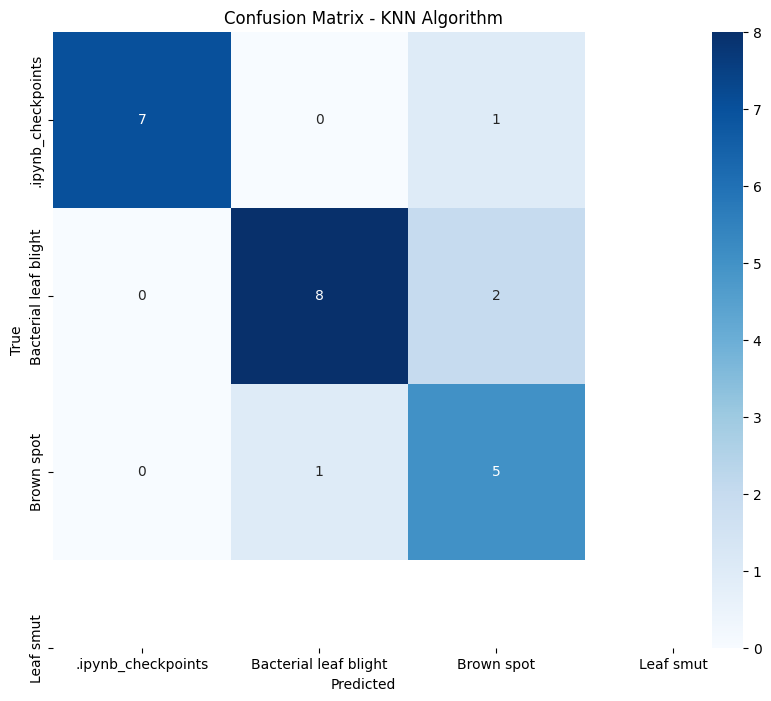

In [97]:
import seaborn as sns

y_val_pred = knn_model.predict(val_features)

# Calculate confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - KNN Algorithm')
plt.show()


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


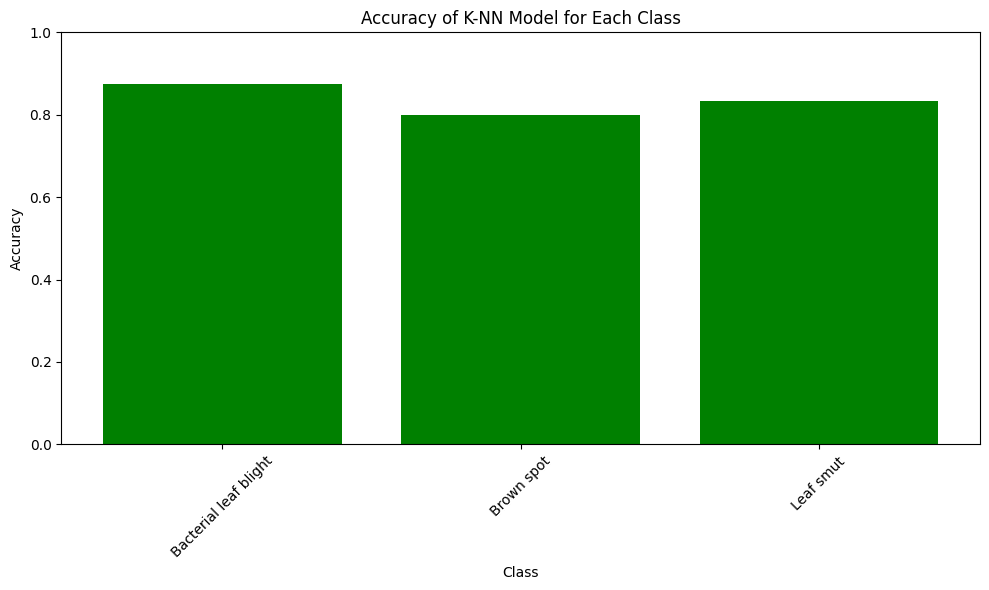

In [94]:
# Calculate accuracy for each class
class_accuracies = []
for i in range(len(class_names)):
    class_indices = np.where(y_val == i)[0]
    class_accuracy = accuracy_score(y_val[class_indices], y_val_pred[class_indices])
    class_accuracies.append(class_accuracy)

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(class_names, class_accuracies, color='green')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Accuracy of K-NN Model for Each Class')
plt.xticks(rotation=45)
plt.ylim([0, 1])
plt.tight_layout()
plt.show()


# **Classification Report**

In [55]:
from sklearn.metrics import classification_report
# Generate classification report
report = classification_report(y_val, y_val_pred, target_names=class_names, labels=np.unique(y_val))

# Print the classification report
print(report)


                       precision    recall  f1-score   support

   .ipynb_checkpoints       1.00      0.88      0.93         8
Bacterial leaf blight       0.89      0.80      0.84        10
           Brown spot       0.62      0.83      0.71         6

             accuracy                           0.83        24
            macro avg       0.84      0.84      0.83        24
         weighted avg       0.86      0.83      0.84        24



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2326: UserWarning: labels size, 3, does not match size of target_names, 4
  warnings.warn(


# **Random Forest**

In [56]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load saved features
train_features = np.load("train_features.npy")
val_features = np.load("val_features.npy")

# Split the labels that you loaded earlier
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators and other hyperparameters
rf_model.fit(train_features, y_train)

# Predict on the validation set
y_val_pred = rf_model.predict(val_features)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", accuracy)


Validation Accuracy: 0.7916666666666666


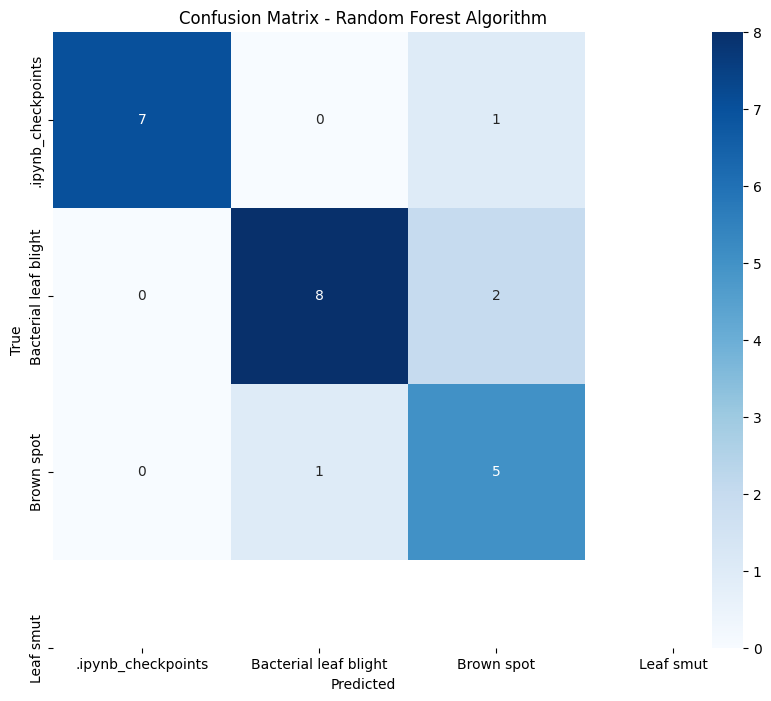

In [98]:
# Calculate confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest Algorithm')
plt.show()


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


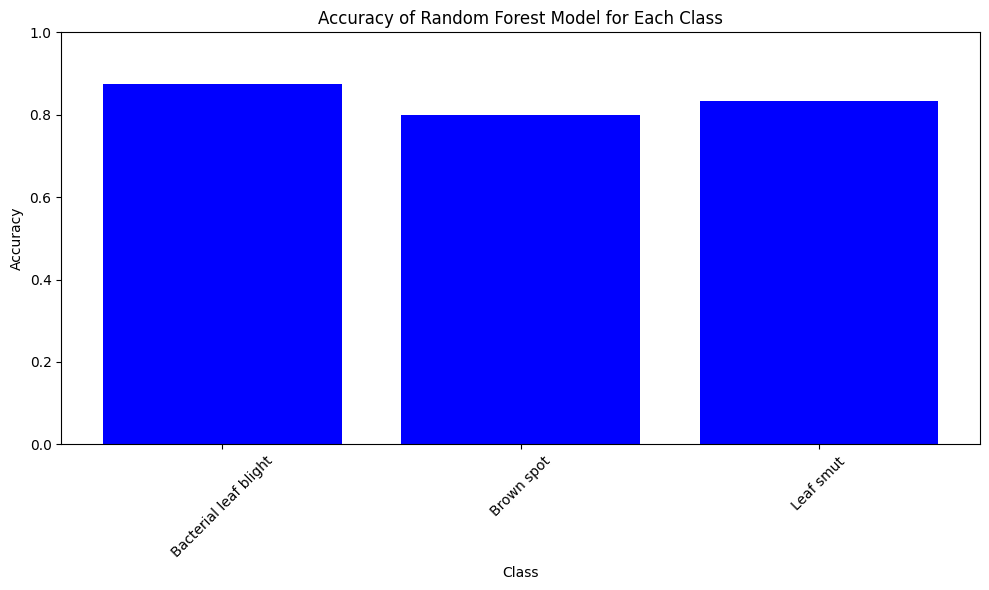

In [95]:
# Calculate accuracy for each class
class_accuracies = []
for i in range(len(class_names)):
    class_indices = np.where(y_val == i)[0]
    class_accuracy = accuracy_score(y_val[class_indices], y_val_pred[class_indices])
    class_accuracies.append(class_accuracy)

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(class_names, class_accuracies, color='blue')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Accuracy of Random Forest Model for Each Class')
plt.xticks(rotation=45)
plt.ylim([0, 1])
plt.tight_layout()
plt.show()


# **Classification Report**

In [57]:
from sklearn.metrics import classification_report
# Generate classification report
report = classification_report(y_val, y_val_pred, target_names=class_names, labels=np.unique(y_val))
# Print the classification report
print(report)


                       precision    recall  f1-score   support

   .ipynb_checkpoints       0.88      0.88      0.88         8
Bacterial leaf blight       0.88      0.70      0.78        10
           Brown spot       0.62      0.83      0.71         6

             accuracy                           0.79        24
            macro avg       0.79      0.80      0.79        24
         weighted avg       0.81      0.79      0.79        24



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2326: UserWarning: labels size, 3, does not match size of target_names, 4
  warnings.warn(


# **Comparision of Algorithm**

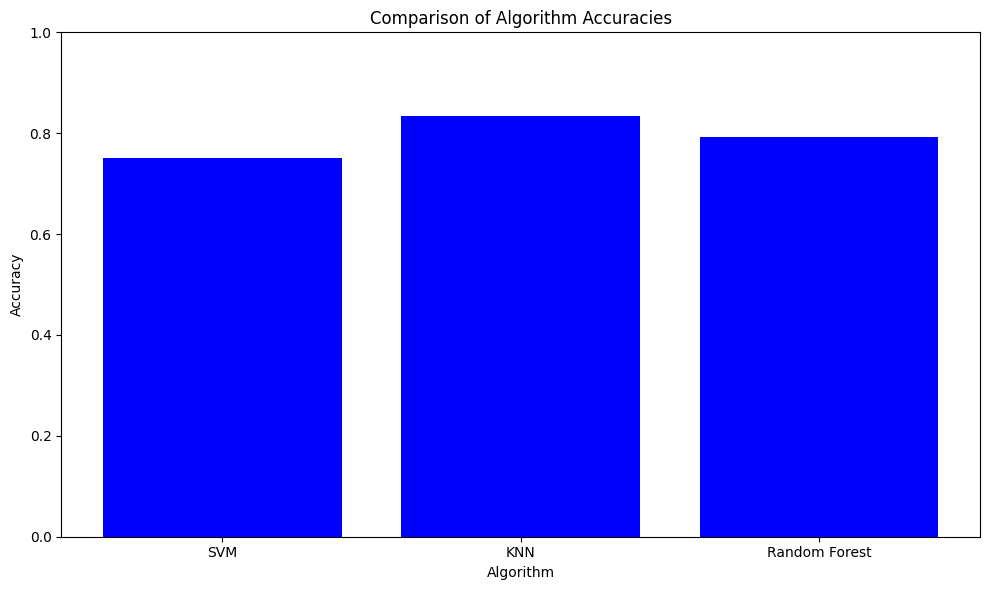

SVM Accuracy: 0.75
KNN Accuracy: 0.8333333333333334
Random Forest Accuracy: 0.7916666666666666


In [96]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load saved features
train_features = np.load("train_features.npy")
val_features = np.load("val_features.npy")

# Split the labels that you loaded earlier
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

# Train and evaluate SVM model
svm_model = SVC(kernel="linear")  # You can try different kernels
svm_model.fit(train_features, y_train)
y_val_pred_svm = svm_model.predict(val_features)
accuracy_svm = accuracy_score(y_val, y_val_pred_svm)

# Train and evaluate K-Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can choose different values for k
knn_model.fit(train_features, y_train)
y_val_pred_knn = knn_model.predict(val_features)
accuracy_knn = accuracy_score(y_val, y_val_pred_knn)

# Train and evaluate Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators and other hyperparameters
rf_model.fit(train_features, y_train)
y_val_pred_rf = rf_model.predict(val_features)
accuracy_rf = accuracy_score(y_val, y_val_pred_rf)

# Store accuracies
accuracies = {
    'SVM': accuracy_svm,
    'KNN': accuracy_knn,
    'Random Forest': accuracy_rf
}

# Plot a bar chart comparing accuracies
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='blue')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Comparison of Algorithm Accuracies')
plt.ylim([0, 1])
plt.tight_layout()
plt.show()

# Print the accuracies
for algorithm, accuracy in accuracies.items():
    print(f"{algorithm} Accuracy: {accuracy}")
